In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

c:\Users\cyber\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [15]:

cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])


In [16]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2288s 1s/step - accuracy: 0.3926 - loss: 2.1755 - val_accuracy: 0.8419 - val_loss: 0.4959
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2279s 1s/step - accuracy: 0.8333 - loss: 0.5350 - val_accuracy: 0.9089 - val_loss: 0.2798
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2311s 1s/step - accuracy: 0.9030 - loss: 0.3045 - val_accuracy: 0.9313 - val_loss: 0.2083
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2206s 1s/step - accuracy: 0.9333 - loss: 0.2059 - val_accuracy: 0.9476 - val_loss: 0.1615
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2021s 920ms/step - accuracy: 0.9520 - loss: 0.1476 - val_accuracy: 0.9536 - val_loss: 0.1490
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2067s 941ms/step - accuracy: 0.9643 - loss: 0.1105 - val_accuracy: 0.9595 - val_loss: 0.1229
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2054s 935ms/step - accuracy: 0.9704 - loss: 0.0898 - val_accuracy: 0.9219 - val_loss: 0.2684
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1942s 884ms/step - accura

train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

In [18]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 102s 186ms/step - accuracy: 0.9667 - loss: 0.1134
Validation accuracy: 0.9681880474090576


In [19]:
cnn.save('trained_plant_disease_model.keras')

In [20]:
training_history.history

{'accuracy': [0.595874547958374,
  0.8570311069488525,
  0.9141759872436523,
  0.9400810599327087,
  0.9543779492378235,
  0.9655167460441589,
  0.9714488983154297,
  0.9756170511245728,
  0.9795433282852173,
  0.9818194508552551],
 'loss': [1.3769382238388062,
  0.4563078284263611,
  0.26874998211860657,
  0.18385091423988342,
  0.13932760059833527,
  0.1065366119146347,
  0.08740193396806717,
  0.07462228834629059,
  0.06336314231157303,
  0.05557316541671753],
 'val_accuracy': [0.8419075608253479,
  0.9089460372924805,
  0.9313111901283264,
  0.9476439952850342,
  0.9535624980926514,
  0.959537923336029,
  0.9219212532043457,
  0.9666514992713928,
  0.9610744118690491,
  0.9681880474090576],
 'val_loss': [0.4958723485469818,
  0.2798241674900055,
  0.20833183825016022,
  0.16145294904708862,
  0.14904025197029114,
  0.12285783141851425,
  0.2684061527252197,
  0.11739704757928848,
  0.12972833216190338,
  0.10601013153791428]}

In [21]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [22]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


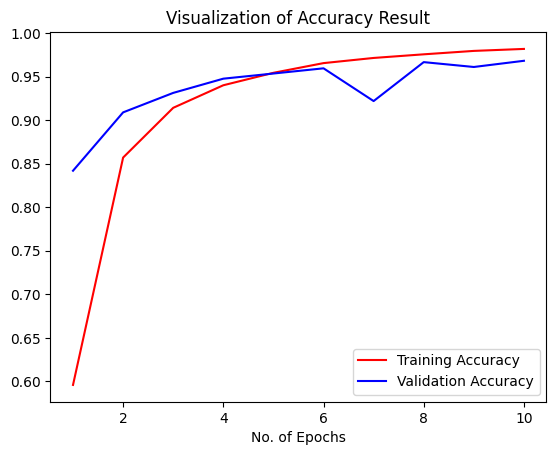

In [23]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [24]:
class_name = validation_set.class_names

In [25]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [26]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 303s 17ms/step


In [27]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [28]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [29]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [30]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [31]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.95      0.96       504
                                 Apple___Black_rot       0.98      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.98       440
                                   Apple___healthy       0.97      0.95      0.96       502
                               Blueberry___healthy       0.92      0.98      0.94       454
          Cherry_(including_sour)___Powdery_mildew       0.97      1.00      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.89      0.93       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.97      0.

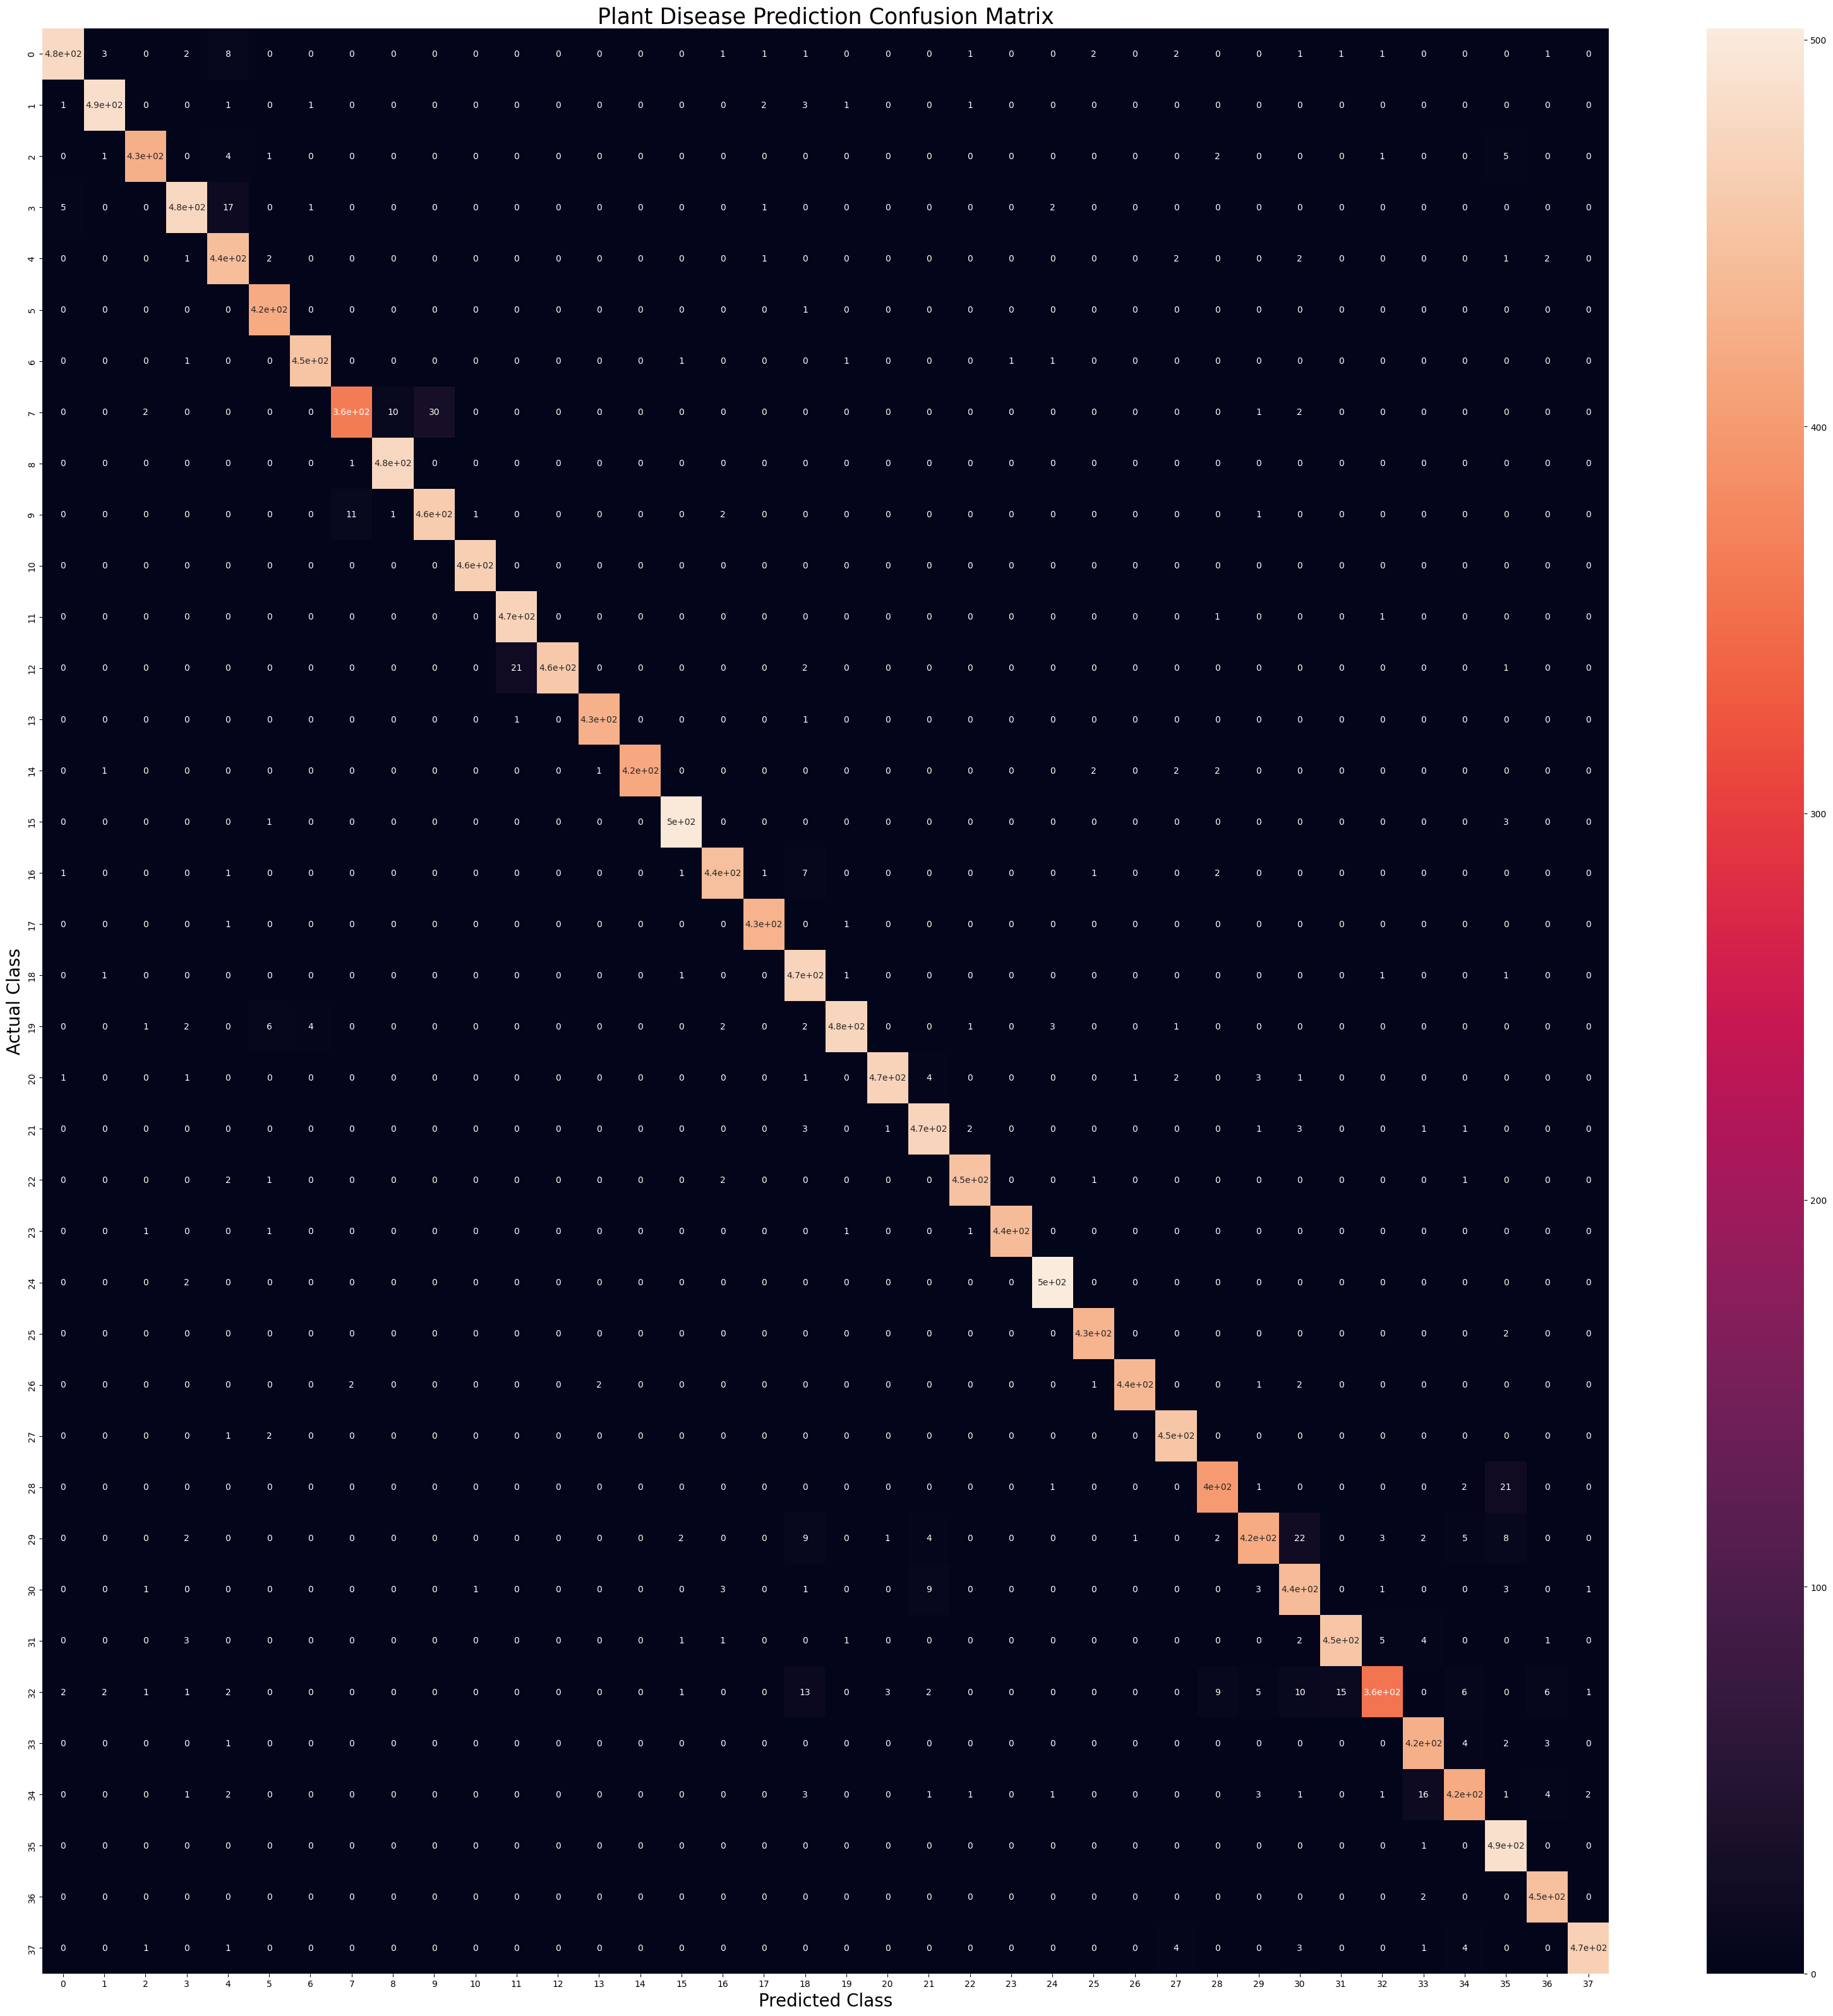

In [32]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()